**FORMULA 1 DATA ANALYSIS & MACHINE LEARNING PROJECT BY RAGHAV KRISHAN GARG**

In Formula 1, statistical analysis plays a significant role in understanding race wins and performance.

Through this project we will try to answer some of the most common statistical questions regarding race wins in F1. We will be dividing our journey into five simple steps for data analysis that are: 

*ASK*: To ask the right questions

*PREPARE*: Prepare the data to be analsysed

*PROCESS*: Process the data

*ANALYSE*: Analyse the data

*SHARE*: Share the findings and suggestions in the desired format for the decision to be made

***

This project provides a comprehensive analysis of Formula 1 race data, focusing on various aspects such as top drivers, constructors, seasonal winners, race statuses, track speeds, and more. It utilizes Pandas for data manipulation, Matplotlib for basic visualization, and Seaborn for more advanced visualizations.

*ALSO WE WILL BE DOING CONSTRUCTOR ANALYSIS*

***

**We have created Machine Learning models to predict the winners on the given feature set of the data**

For the purpose we are using the Formula 1 Dataset available on Kaggle.(https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

<div class="alert alert-block alert-warning">
<b>ASK PHASE</b> 
</div>

In this phase, we will ask the right and relevant questions to find the right answers. This will help us to avoid under-analysis or over-analysis of data. 

1. Which driver has most grand prix wins?
2. Who is the top constructor with most wins?
3. Which driver has the most wins in each season from 1950 to 2022?
4. What is the count of different race statuses (Finished, Disqualified, Accident, Collision, Power loss)?
5. What are the top tracks that hosted the most number of races?
6. What are the percentage of Races Won from Pole Position?
7. What is relationship between starting position and finishing position on the grid?
8. What is the average fastest lap speed over time for each track?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb #python data visualisation library based on matplotlib
import time

start = time.time()

%matplotlib inline

<div class="alert alert-block alert-warning">
<b>PREPARE & PROCESS PHASE</b> 
</div>

In [2]:
results = pd.read_csv('F1_data/results.csv')
drivers = pd.read_csv('F1_data/drivers.csv')
races = pd.read_csv('F1_data/races.csv')
constructors = pd.read_csv('F1_data/constructors.csv')
status = pd.read_csv('F1_data/status.csv')
print(drivers.head())
print(results.head())
print(races.head())
print(constructors.head())
print(status.head())

   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2        

In [3]:
df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on = 'raceId', how = 'left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'constructorName', 'nationality']], on = 'constructorId', how = 'left')
df = pd.merge(df, status[['statusId','status']], on = 'statusId', how = 'left')

In [4]:
df = df.sort_values(by = ['year', 'round', 'positionOrder'], ascending = [False, True, True])
# df.to_csv('final_merge.csv') #exporting the file

In [5]:
df.reset_index(drop = True, inplace = True)

In [6]:
print(df.shape)

(25840, 26)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [8]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,year,name,round,driverRef,nationality_x,constructorName,nationality_y,status
0,25406,1074,844,6,16,1,1,1,1,26.0,...,206.018,1,2022,Bahrain Grand Prix,1,leclerc,Monegasque,Ferrari,Italian,Finished
1,25407,1074,832,6,55,3,2,2,2,18.0,...,203.501,1,2022,Bahrain Grand Prix,1,sainz,Spanish,Ferrari,Italian,Finished
2,25408,1074,1,131,44,5,3,3,3,15.0,...,202.469,1,2022,Bahrain Grand Prix,1,hamilton,British,Mercedes,German,Finished
3,25409,1074,847,131,63,9,4,4,4,12.0,...,202.313,1,2022,Bahrain Grand Prix,1,russell,British,Mercedes,German,Finished
4,25410,1074,825,210,20,7,5,5,5,10.0,...,201.641,1,2022,Bahrain Grand Prix,1,kevin_magnussen,Danish,Haas F1 Team,American,Finished


In [9]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10, 6

<div class="alert alert-block alert-warning">
<b>ANALYSE PHASE</b> 
</div>

***
1. Which driver has most grand prix wins?

           A bar plot is created using Seaborn and Matplotlib to display the top drivers with the most Grand Prix wins. The data is grouped, counted, sorted, and plotted.
***

In [10]:
driverWinner = df.loc[df['positionOrder'] == 1].groupby('driverRef')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
driverWinner.head()

,driverRef,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,senna,41


,driverRef,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,senna,41
5,max_verstappen,35
6,alonso,32
7,mansell,31
8,stewart,27
9,clark,25


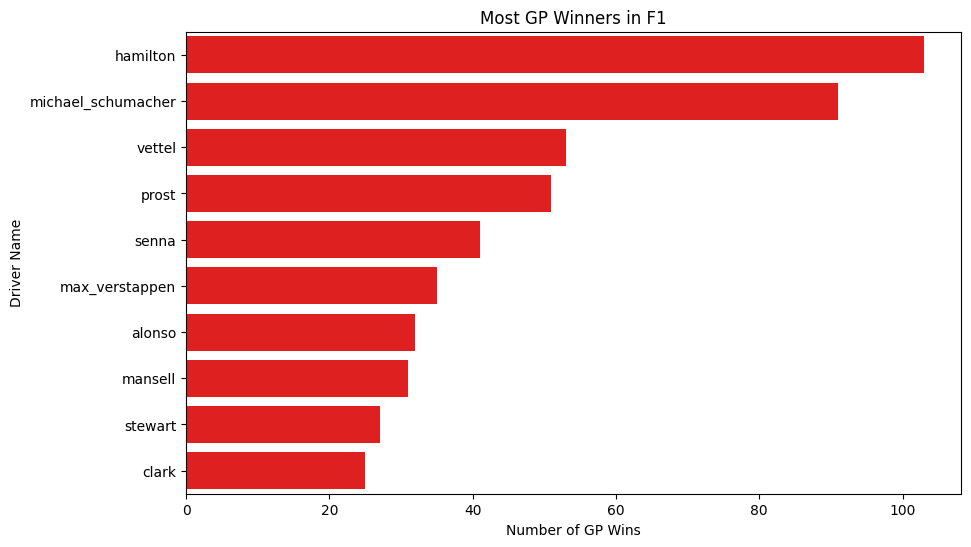

In [11]:
sb.barplot(data = driverWinner.head(10), y = 'driverRef', x = 'positionOrder', color = 'red')
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
driverWinner.head(10)

***
2. Who is the top constructor with most wins?

        Similar to the driver's plot, a bar plot displays the top constructors with the most Grand Prix wins.
***

In [12]:
consWinner = df.loc[df['positionOrder'] == 1].groupby('constructorName')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
consWinner.head()

,constructorName,positionOrder
0,Ferrari,243
1,McLaren,179
2,Mercedes,125
3,Williams,114
4,Red Bull,92


,constructorName,positionOrder
0,Ferrari,243
1,McLaren,179
2,Mercedes,125
3,Williams,114
4,Red Bull,92
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


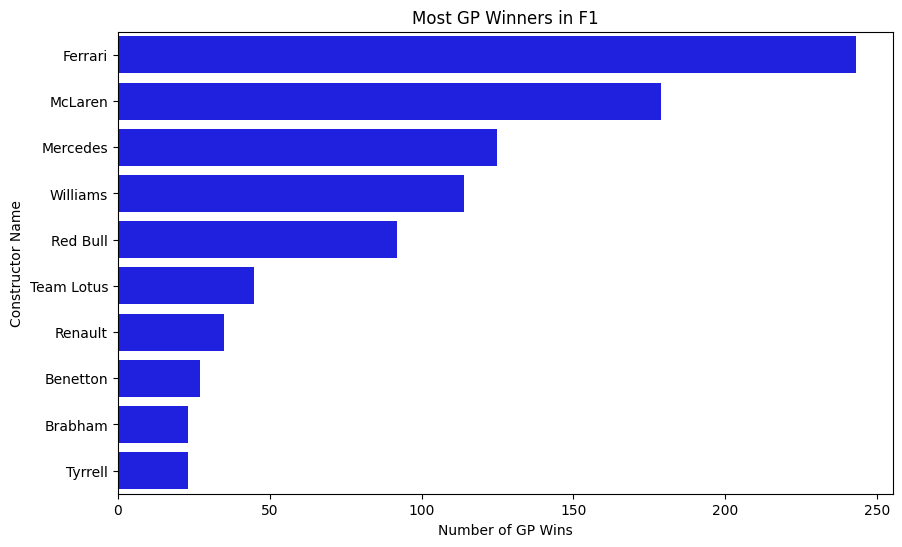

In [13]:
sb.barplot(data = consWinner.head(10), y = 'constructorName', x = 'positionOrder', color = 'blue')
plt.title('Most GP Winners in F1')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP Wins')
consWinner.head(10)

***
3. Which driver has the most wins in each season from 1950 to 2022?

        The code calculates and prints the driver with the most wins in each season from 1950 to 2022.
***            

In [14]:
driverSeasonWins = []
   
for i in range(1950,2023):
    df_year = df[df['year'] == i]
    seasonDriverWinner = df_year.loc[df['positionOrder'] == 1].groupby('driverRef')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
    driverSeasonWins.append((i,seasonDriverWinner.head(1).values.tolist()[0][0],seasonDriverWinner.head(1).values.tolist()[0][1]))

for j in driverSeasonWins:
    print(j)
    

(1950, 'fangio', 3)
(1951, 'fangio', 3)
(1952, 'ascari', 6)
(1953, 'ascari', 5)
(1954, 'fangio', 6)
(1955, 'fangio', 4)
(1956, 'fangio', 3)
(1957, 'fangio', 4)
(1958, 'moss', 4)
(1959, 'brooks', 2)
(1960, 'jack_brabham', 5)
(1961, 'moss', 2)
(1962, 'hill', 4)
(1963, 'clark', 7)
(1964, 'clark', 3)
(1965, 'clark', 6)
(1966, 'jack_brabham', 4)
(1967, 'clark', 4)
(1968, 'hill', 3)
(1969, 'stewart', 6)
(1970, 'rindt', 5)
(1971, 'stewart', 6)
(1972, 'emerson_fittipaldi', 5)
(1973, 'stewart', 5)
(1974, 'emerson_fittipaldi', 3)
(1975, 'lauda', 5)
(1976, 'hunt', 6)
(1977, 'mario_andretti', 4)
(1978, 'mario_andretti', 6)
(1979, 'jones', 4)
(1980, 'jones', 5)
(1981, 'piquet', 3)
(1982, 'arnoux', 2)
(1983, 'prost', 4)
(1984, 'prost', 7)
(1985, 'prost', 5)
(1986, 'mansell', 5)
(1987, 'mansell', 6)
(1988, 'senna', 8)
(1989, 'senna', 6)
(1990, 'senna', 6)
(1991, 'senna', 7)
(1992, 'mansell', 9)
(1993, 'prost', 7)
(1994, 'michael_schumacher', 8)
(1995, 'michael_schumacher', 9)
(1996, 'damon_hill', 8)


***
4. What is the count of different race statuses (Finished, Disqualified, Accident, Collision, Power loss)?

          The code calculates and prints the count of different race statuses (Finished, Disqualified, Accident, Collision, Power loss) and displays a list of tuples containing the counts and corresponding status names.             
***                

In [15]:
statusCount = df.groupby('statusId')['status'].count().sort_values(ascending = False).to_frame().reset_index()
statusCombined = []
# 1 = Finished
# 2 = Disqualified
# 3 = Accident
# 4 = Collision
# 75 = Power loss
for k in [1, 2, 3, 4, 75]:
    statusIndividual = statusCount[statusCount['statusId'] == k]
    # print((status['statusId'] == k))
    # print(statusIndividual)
    statusCombined.append((statusIndividual.values.tolist()[0][1],status.loc[status['statusId'] == k].values.tolist()[0][1] ))

print(statusCombined)


[(7083, 'Finished'), (143, 'Disqualified'), (1044, 'Accident'), (833, 'Collision'), (14, 'Power loss')]


***
5. What are the top tracks that hosted the most number of races?
        
        The code calculates and prints the tracks that hosted the most number of races.
***

In [16]:
# tracks which hosted most number of races
topTracks = races.groupby('name')['year'].count().sort_values(ascending = False).to_frame().reset_index()
print(topTracks)
# print(topTracks.head().values.tolist()[:5])
topTracksList = []

for m in topTracks.head().values.tolist()[:5]:
    topTracksList.append(m[0])

print(topTracksList)

                             name  year
0              Italian Grand Prix    74
1              British Grand Prix    74
2               Monaco Grand Prix    69
3              Belgian Grand Prix    68
4               German Grand Prix    64
5               French Grand Prix    62
6              Spanish Grand Prix    53
7             Canadian Grand Prix    52
8            Brazilian Grand Prix    48
9        United States Grand Prix    44
10           Hungarian Grand Prix    38
11          Australian Grand Prix    37
12            Japanese Grand Prix    37
13            Austrian Grand Prix    36
14               Dutch Grand Prix    33
15          San Marino Grand Prix    26
16            European Grand Prix    23
17       South African Grand Prix    23
18             Mexican Grand Prix    20
19           Argentine Grand Prix    20
20           Malaysian Grand Prix    19
21             Bahrain Grand Prix    19
22          Portuguese Grand Prix    18
23             Chinese Grand Prix    16


***
6. What are the percentage of Races Won from Pole Position?

        The code calculates and prints the percentage of races won from the pole position.
***        

In [17]:
# % of Races won from Pole Position

startingPos = df.loc[df['grid'] == 1]['positionOrder'].count()
finalPos = df.loc[(df['grid'] == 1) & (df['positionOrder'] == 1)]['driverId'].count()

print('Pole position : ',startingPos)
print('Races won from pole position : ',finalPos)

print("% of races won from pole position : ", round(((finalPos*100)/startingPos),2))

Pole position :  1090
Races won from pole position :  456
% of races won from pole position :  41.83


***
7. What is relationship between starting position and finishing position on the grid?

        A scatter plot is created to visualize the relationship between starting position and finishing position on the grid.
***

Text(0.5, 0, 'Starting Place')

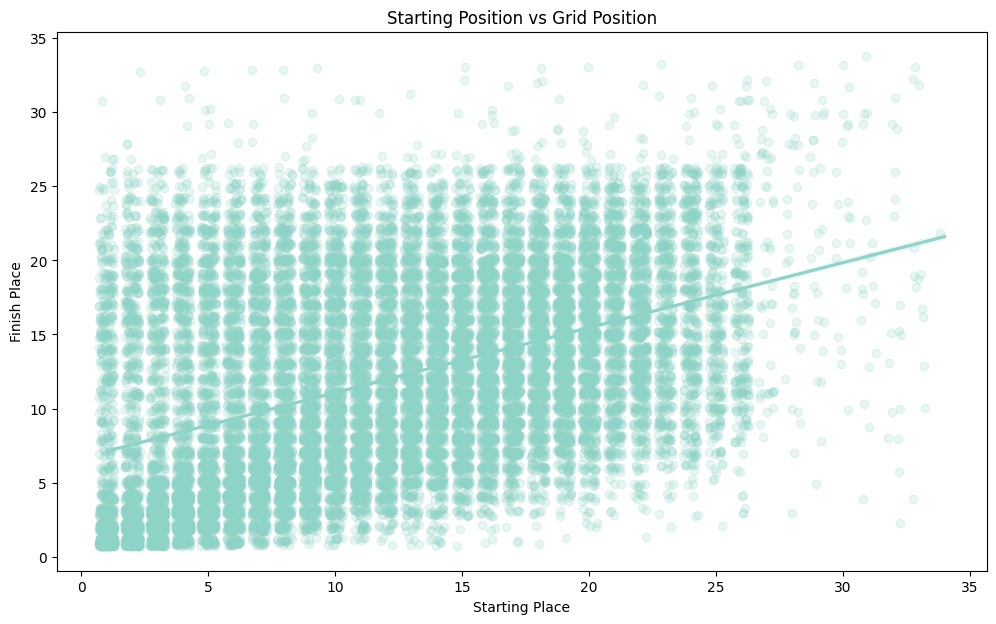

In [18]:
dfNoZero = df[df['grid'] != 0]

plt.figure(figsize = [12,7])
sb.regplot(data = dfNoZero, x = 'grid', y = 'positionOrder', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5})
plt.title('Starting Position vs Grid Position')
plt.ylabel('Finish Place')
plt.xlabel('Starting Place')

***
8. What is the average fastest lap speed over time for each track?

         The code calculates the average fastest lap speed for each track and year from 2004 onwards. It then uses Seaborn to create a facet grid of scatter plots to visualize the average speed trend for each track
***

In [19]:
df.fastestLapSpeed.replace('\\N', np.nan, inplace = True)
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)

                           name  year  fastestLapSpeed
0   70th Anniversary Grand Prix  2020       234.248250
1          Abu Dhabi Grand Prix  2009       198.041100
2          Abu Dhabi Grand Prix  2010       193.559045
3          Abu Dhabi Grand Prix  2011       189.779522
4          Abu Dhabi Grand Prix  2012       187.682739
5          Abu Dhabi Grand Prix  2013       189.595286
6          Abu Dhabi Grand Prix  2014       187.267400
7          Abu Dhabi Grand Prix  2015       187.770789
8          Abu Dhabi Grand Prix  2016       188.597273
9          Abu Dhabi Grand Prix  2017       194.579650
10         Abu Dhabi Grand Prix  2018       194.262368
11         Abu Dhabi Grand Prix  2019       195.705200
12         Abu Dhabi Grand Prix  2020       196.079000
13         Abu Dhabi Grand Prix  2021       215.871105
14         Abu Dhabi Grand Prix  2022       211.681050
15        Australian Grand Prix  2004       219.963900
16        Australian Grand Prix  2005       218.430250
17        

C:\Users\dell\anaconda3\envs\datascience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Average speed amongst all teams during the fasted lap at the individual GPs : ')

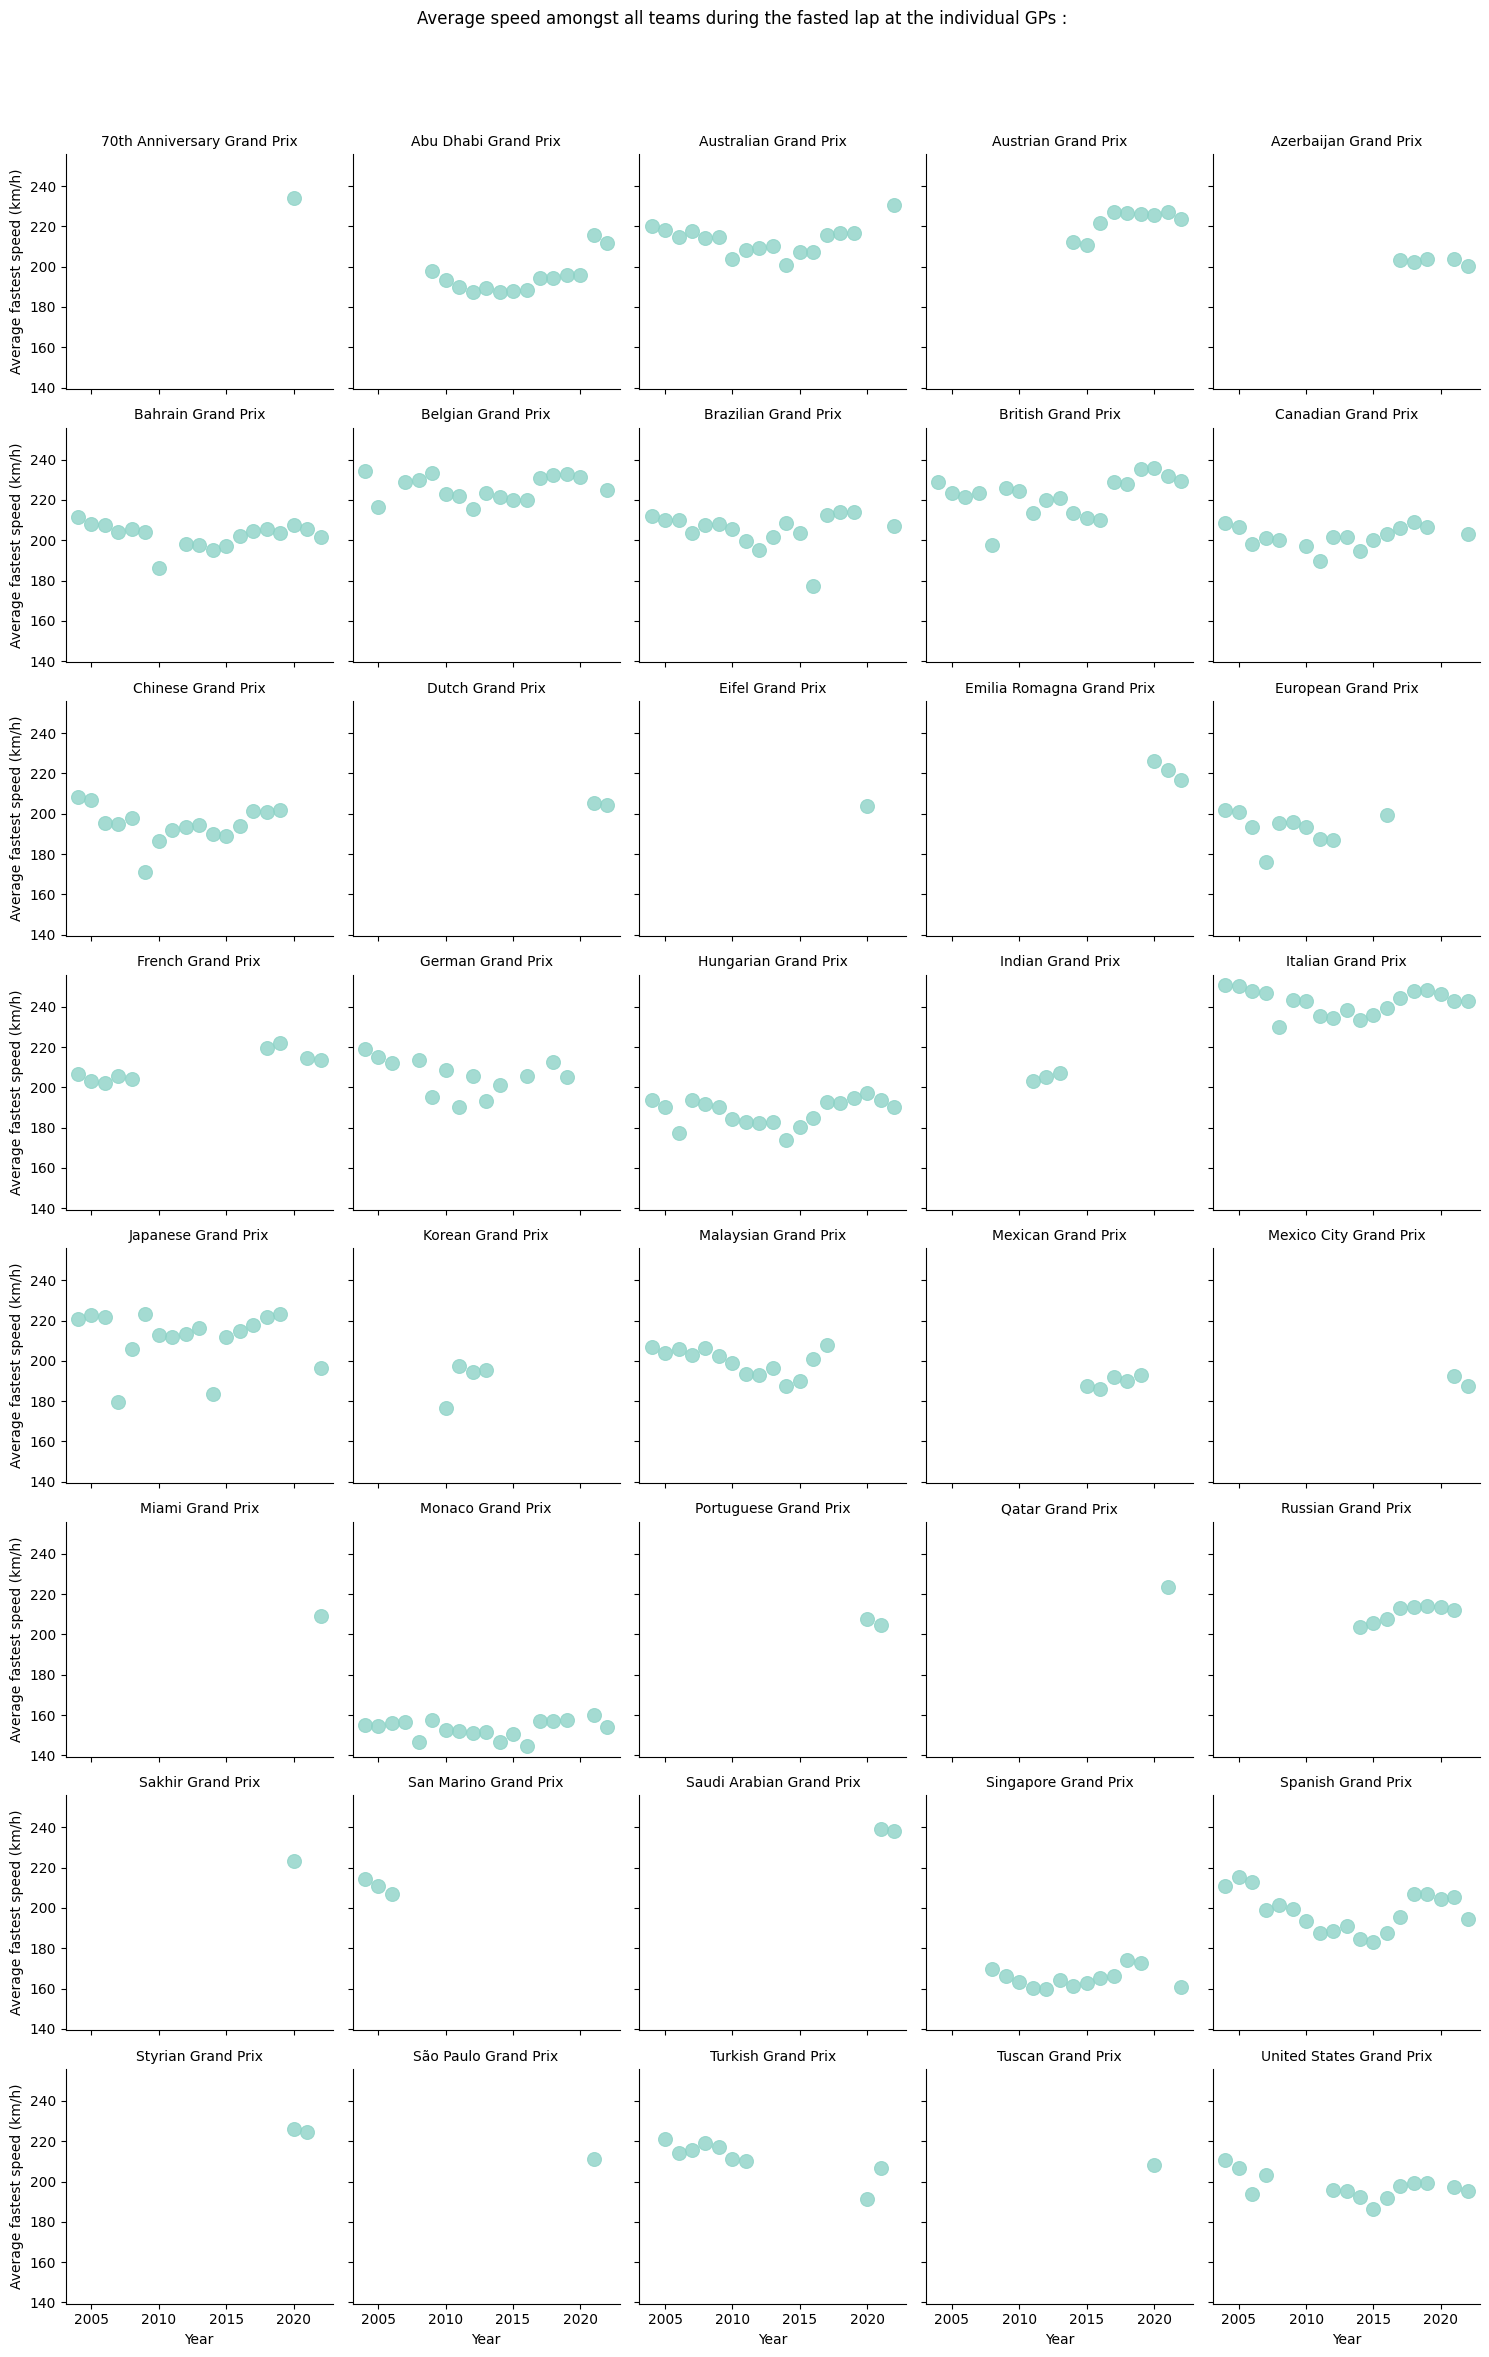

In [20]:
dfSpeed = df[df['year'] >= 2004] #since time data is avialable after 2004

dfSpeedGroup = dfSpeed.groupby(['name', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()
print(dfSpeedGroup.head(20))
print('All time average speed of tracks : ', dfSpeed.groupby(['name'])['fastestLapSpeed'].mean().to_frame().reset_index())

g = sb.FacetGrid(data = dfSpeedGroup, col = 'name', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha = 0.8, linewidth = 0.8, s = 100)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top = 0.92)
g.fig.suptitle('Average speed amongst all teams during the fasted lap at the individual GPs : ')

https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet

<div class="alert alert-block alert-info">
<b>
    Constructors Analysis
    </b> 
</div>

In [21]:
constructorId = 9
consDf = df[df['constructorId'] == constructorId]
# print(consDf)

racesParticipated = list(set(consDf['raceId'].tolist())) #gives list of races participated
racesParticipated.sort()
# print(racesParticipated)

yearsParticipated = [] #RaceId : Year
for i in racesParticipated :
    yearsParticipated.append((i,consDf.loc[consDf['raceId'] == i, "year"].tolist()[0]))
# print(yearsParticipated)

noOfRaces = len(yearsParticipated)
constructorName = constructors.loc[constructors['constructorId'] == constructorId, 'constructorName'].tolist()[0]
# print(constructorName)
entryYear = min([x[1] for x in yearsParticipated])

print(f'{constructorName} started racing from year {entryYear}.\n')
print(f'{constructorName} did total {noOfRaces} races till 2022.\n')

consDrivers = consDf.groupby('driverRef')['raceId'].count().sort_values(ascending = False).to_frame().reset_index()
print(consDrivers)

consRacesWon = consDf[consDf['positionOrder'] == 1]
# print(consRacesWon)
print(f'\nNumber of races won by {constructorName} till 2022 is {len(consRacesWon)}.')

Red Bull started racing from year 2005.

Red Bull did total 348 races till 2022.

         driverRef  raceId
0   max_verstappen     140
1           webber     129
2           vettel     113
3        ricciardo     100
4        coulthard      72
5            perez      44
6            klien      30
7            albon      26
8            kvyat      23
9            gasly      12
10          liuzzi       4
11        doornbos       3

Number of races won by Red Bull till 2022 is 92.


## Machine Learning 

In [22]:
import pickle
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
plt.style.use('seaborn')

np.set_printoptions(precision=4)

C:\Users\dell\AppData\Local\Temp\ipykernel_11192\3516829874.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#### ML MODEL FOR DRIVERS

We will be calculating the **drivers confidence score** in which factors like status(finished or not), number of races will be considered. It will tell us that the driver is able to finish how many races that it starts. More the confidenceScore better the driver reliability and performance will be

In [23]:
driverRacesFinished = df[df['status'] == 'Finished'].groupby('driverRef')['status'].count().to_frame().reset_index()
driverRacesFinished.rename(columns = {'status':'Races_Finished'}, inplace = True)

driverRacesStarted = df.groupby('driverRef')['status'].count().to_frame().reset_index()
driverRacesStarted.rename(columns = {'status':'Races_Started'}, inplace = True)

# print(driverRacesFinished)
# print(driverRacesStarted)

driverRaces = driverRacesFinished.merge(driverRacesStarted, on = 'driverRef', how = 'left')
driverRaces['driverConfidence'] = 1 - ((driverRaces['Races_Started'] - driverRaces['Races_Finished'])/driverRaces['Races_Started'])
# print(driverRaces)

#FOR ACTIVE DRIVERS 

active_drivers = ['leclerc', 'sainz', 'hamilton', 'russell',
                  'kevin_magnussen', 'bottas', 'ocon', 'tsunoda',
                  'alonso', 'zhou', 'mick_schumacher', 'stroll',
                  'albon', 'ricciardo', 'norris', 'latifi',
                  'hulkenberg', 'perez', 'max_verstappen', 'gasly']

driverRaces['active_driver'] = driverRaces['driverRef'].apply(lambda x: int(x in active_drivers))

# print(driverRaces[driverRaces['active_driver'] == 1])

driverConfidenceDict = dict(zip(driverRaces[driverRaces['active_driver'] == 1]['driverRef'], driverRaces[driverRaces['active_driver'] == 1]['driverConfidence']))

print(driverConfidenceDict)

{'albon': 0.6101694915254237, 'alonso': 0.6284916201117319, 'bottas': 0.7462686567164178, 'gasly': 0.4814814814814815, 'hamilton': 0.8709677419354839, 'hulkenberg': 0.5108695652173914, 'kevin_magnussen': 0.323943661971831, 'latifi': 0.29508196721311475, 'leclerc': 0.6699029126213591, 'max_verstappen': 0.7668711656441718, 'mick_schumacher': 0.2727272727272727, 'norris': 0.6463414634146342, 'ocon': 0.49549549549549554, 'perez': 0.5696202531645569, 'ricciardo': 0.603448275862069, 'russell': 0.36585365853658536, 'sainz': 0.50920245398773, 'stroll': 0.38524590163934425, 'tsunoda': 0.34090909090909094, 'zhou': 0.4545454545454546}


**For the purpose of Machine Learning only the active drivers are taken into the consideration**

using our hypothese we have selected the following features for the purpose of creating and training a ML model 
* name : TRACK NAME
* driverRef : Driver Name
* driverConfidence : Driver Confidence
* grid : starting position
* positionOrder : finshing position

In [24]:
activeDriver = df[df['driverRef'].isin(active_drivers)]
activeDriver['driverConfidence'] = activeDriver['driverRef'].apply(lambda x:driverConfidenceDict[x])
print(activeDriver.columns)


activeDriver = activeDriver[['name', 'driverRef', 'grid', 'positionOrder', 'driverConfidence']]
print(activeDriver)

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'name', 'round', 'driverRef',
       'nationality_x', 'constructorName', 'nationality_y', 'status',
       'driverConfidence'],
      dtype='object')
                          name        driverRef  grid  positionOrder  \
0           Bahrain Grand Prix          leclerc     1              1   
1           Bahrain Grand Prix            sainz     3              2   
2           Bahrain Grand Prix         hamilton     5              3   
3           Bahrain Grand Prix          russell     9              4   
4           Bahrain Grand Prix  kevin_magnussen     7              5   
...                        ...              ...   ...            ...   
8694      Hungarian Grand Prix           alonso    18             18   
8720       

C:\Users\dell\AppData\Local\Temp\ipykernel_11192\3978680577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activeDriver['driverConfidence'] = activeDriver['driverRef'].apply(lambda x:driverConfidenceDict[x])


In [25]:
# matrix = activeDriver.corr()
# print(matrix)

We will be classifying the positionOrder into Podium and non-podium finishes to simplfy our ML model. For that purpose we have created position_index function

In [26]:
def position_index(x):
    if x<4:
        return 1
    else :
        return 2

In [27]:
sc  = StandardScaler()
le = LabelEncoder()

activeDriver['name'] = le.fit_transform(activeDriver['name'])
activeDriver['driverRef'] = le.fit_transform(activeDriver['driverRef'])

# y_d = activeDriver['positionOrder']
y_d = activeDriver['positionOrder'].apply(lambda x: position_index(x))

print(activeDriver)
print(y_d)

      name  driverRef  grid  positionOrder  driverConfidence
0        5          8     1              1          0.669903
1        5         16     3              2          0.509202
2        5          4     5              3          0.870968
3        5         15     9              4          0.365854
4        5          6     7              5          0.323944
...    ...        ...   ...            ...               ...
8694    17          1    18             18          0.628492
8720     6          1    20             22          0.628492
8733    19          1    21             13          0.628492
8763    39          1    17             21          0.628492
8775    20          1    18             11          0.628492

[2828 rows x 5 columns]
0       1
1       1
2       1
3       2
4       2
       ..
8694    2
8720    2
8733    2
8763    2
8775    2
Name: positionOrder, Length: 2828, dtype: int64


##### We will be checking the accuracy for the six machine learning methods on the data


In [28]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []

x = activeDriver[['name', 'driverRef', 'grid', 'driverConfidence']]
for model in models:
    cv = StratifiedKFold(n_splits=20,random_state=1,shuffle=True)
    result = cross_val_score(model, x, y_d, cv=cv, scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')
#     print(result)

LogisticRegression : 0.8617196084307261
DecisionTreeClassifier : 0.8217735490959944
RandomForestClassifier : 0.8419238837278993
SVC : 0.858203476176206
GaussianNB : 0.8461617221056837
KNeighborsClassifier : 0.8497327939266807


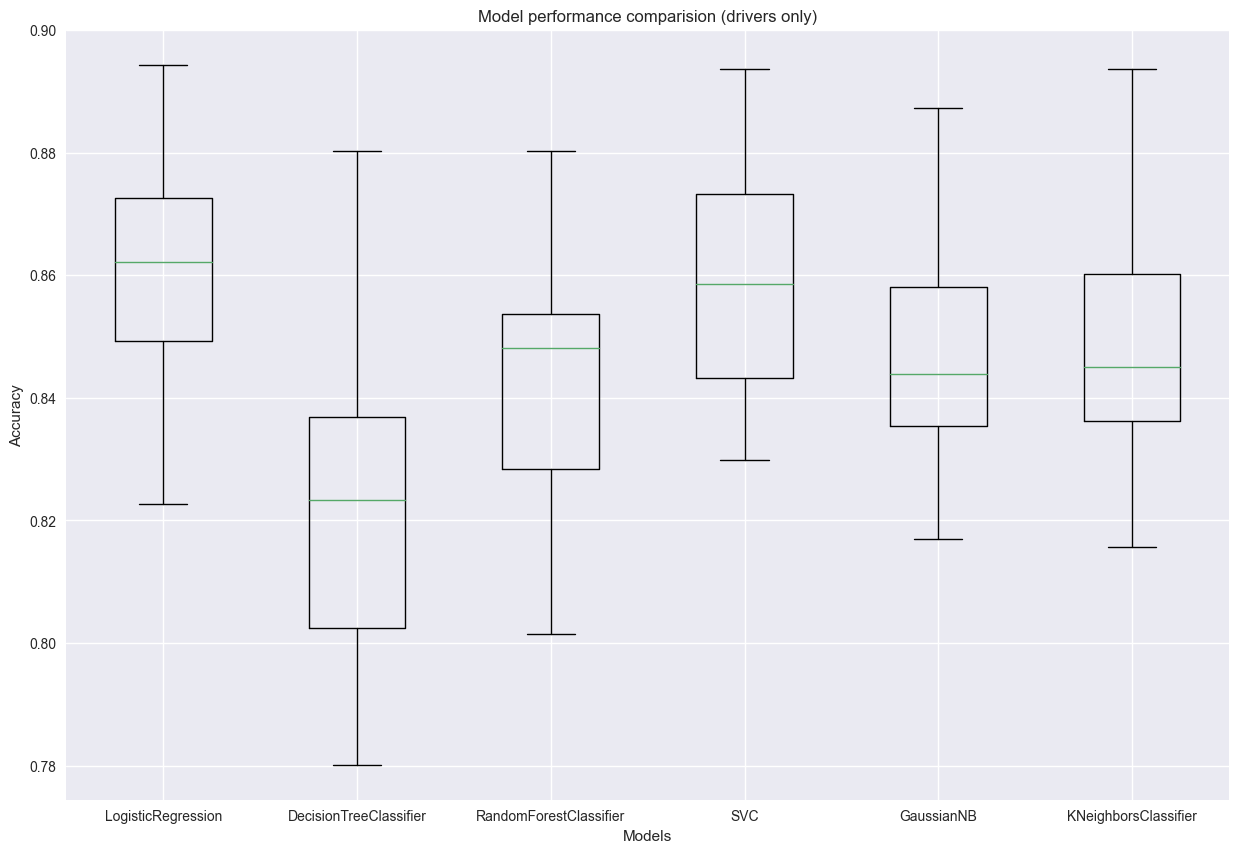

In [29]:
plt.figure(figsize=(15,10))
plt.boxplot(x = results_dri, labels = name)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (drivers only)')
plt.show()

#### ML MODEL FOR CONSTRUCTORS

We will be calculating the **constructors confidence** in which factors like status(finished or not), number of races will be considered. It will tell us that the constructor is able to finish how many races that it starts. More the confidenceScore better the Constructors reliability and performance will be

In [30]:
consRacesFinished = df[df['status'] == 'Finished'].groupby('constructorName')['status'].count().to_frame().reset_index()
consRacesFinished.rename(columns = {'status':'Races_Finished'}, inplace = True)

consRacesStarted = df.groupby('constructorName')['status'].count().to_frame().reset_index()
consRacesStarted.rename(columns = {'status':'Races_Started'}, inplace = True)

# print(driverRacesFinished)
# print(driverRacesStarted)

consRaces = consRacesFinished.merge(consRacesStarted, on = 'constructorName', how = 'left')
consRaces['consConfidence'] = 1 - ((consRaces['Races_Started'] - consRaces['Races_Finished'])/consRaces['Races_Started'])
# print(driverRaces)

#FOR ACTIVE Constructors 

active_cons = [
'Ferrari',
'Mercedes',
'Alpine F1 Team',
'AlphaTauri',
'Alfa Romeo',
'Haas F1 Team',
'McLaren',
'Williams',
'Aston Martin',
'Red Bull'
]

consRaces['activeConstructors'] = consRaces['constructorName'].apply(lambda x: int(x in active_cons))

consConfidenceDict = dict(zip(consRaces[consRaces['activeConstructors'] == 1]['constructorName'], consRaces[consRaces['activeConstructors'] == 1]['consConfidence']))

print(consConfidenceDict)

{'Alfa Romeo': 0.2137592137592138, 'AlphaTauri': 0.48360655737704916, 'Alpine F1 Team': 0.5568181818181819, 'Aston Martin': 0.4444444444444444, 'Ferrari': 0.5296122709842352, 'Haas F1 Team': 0.26388888888888884, 'McLaren': 0.4980884762424904, 'Mercedes': 0.8089285714285714, 'Red Bull': 0.7011494252873562, 'Williams': 0.43848580441640383}


**For the purpose of Machine Learning only the active Constructors are taken into the consideration**

using our hypothese we have selected the following features for the purpose of creating and training a ML model 
* name : TRACK NAME
* constructorName : Constructor Name
* consConfidence : Constructor Confidence
* grid : starting position
* positionOrder : finshing position

In [31]:
activeCons = df[df['constructorName'].isin(active_cons)]
activeCons['consConfidence'] = activeCons['constructorName'].apply(lambda x:consConfidenceDict[x])
print(activeCons.columns)


activeCons = activeCons[['name', 'constructorName', 'grid', 'positionOrder', 'consConfidence']]
print(activeCons)

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'name', 'round', 'driverRef',
       'nationality_x', 'constructorName', 'nationality_y', 'status',
       'consConfidence'],
      dtype='object')
                     name constructorName  grid  positionOrder  consConfidence
0      Bahrain Grand Prix         Ferrari     1              1        0.529612
1      Bahrain Grand Prix         Ferrari     3              2        0.529612
2      Bahrain Grand Prix        Mercedes     5              3        0.808929
3      Bahrain Grand Prix        Mercedes     9              4        0.808929
4      Bahrain Grand Prix    Haas F1 Team     7              5        0.263889
...                   ...             ...   ...            ...             ...
25825  Italian Grand Prix      Alfa 

C:\Users\dell\AppData\Local\Temp\ipykernel_11192\2574959541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activeCons['consConfidence'] = activeCons['constructorName'].apply(lambda x:consConfidenceDict[x])


In [32]:
activeCons['name'] = le.fit_transform(activeCons['name'])
activeCons['constructorName'] = le.fit_transform(activeCons['constructorName'])

# cy_d = activeCons['positionOrder']
cy_d = activeCons['positionOrder'].apply(lambda x: position_index(x))

print(activeCons)
print(cy_d)

       name  constructorName  grid  positionOrder  consConfidence
0         6                4     1              1        0.529612
1         6                4     3              2        0.529612
2         6                7     5              3        0.808929
3         6                7     9              4        0.808929
4         6                5     7              5        0.263889
...     ...              ...   ...            ...             ...
25825    24                0     7             13        0.213759
25827    24                0     1             15        0.213759
25829    24                4     2             17        0.529612
25830    24                4    25             18        0.529612
25835    24                0     4             23        0.213759

[8023 rows x 5 columns]
0        1
1        1
2        1
3        2
4        2
        ..
25825    2
25827    2
25829    2
25830    2
25835    2
Name: positionOrder, Length: 8023, dtype: int64


##### We will be checking the accuracy for the six machine learning methods on the data

In [33]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []

cx = activeCons[['name', 'constructorName', 'grid', 'consConfidence']]
for model in models:
    cv = StratifiedKFold(n_splits=20,random_state=1,shuffle=True)
    result = cross_val_score(model, cx, cy_d, cv=cv, scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')
#     print(result)

LogisticRegression : 0.776397935509485
DecisionTreeClassifier : 0.7400029155965806
RandomForestClassifier : 0.7565771516482425
SVC : 0.7775164079850125
GaussianNB : 0.756692845001923
KNeighborsClassifier : 0.764181585836404


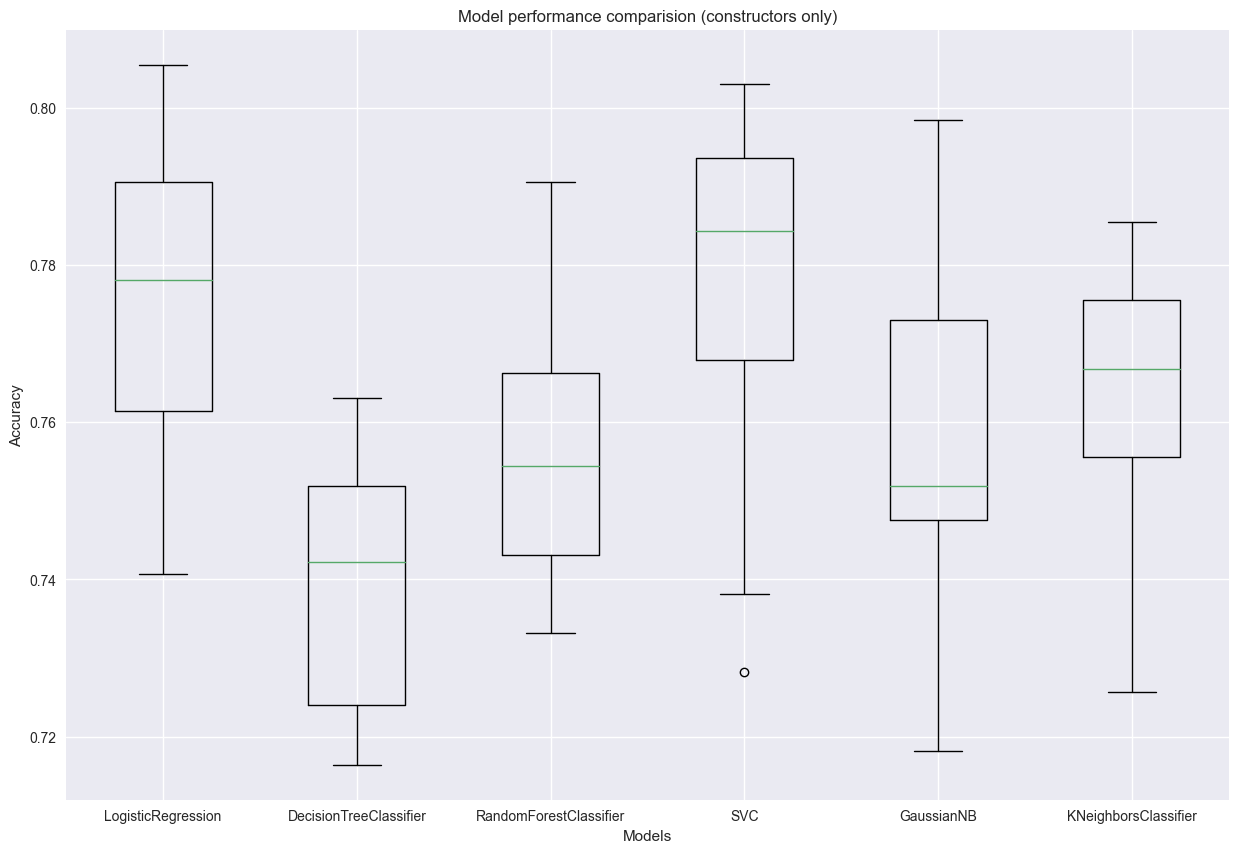

In [34]:
plt.figure(figsize=(15,10))
plt.boxplot(x = results_dri, labels = name)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (constructors only)')
plt.show()

In [35]:
end = time.time()
print(f'Total time taken to execute the code: {round((end - start),2)} seconds')

Total time taken to execute the code: 75.56 seconds


*Formula 1 EDA & ML project* |   **RAGHAV KRISHAN GARG**